# Clustering & PCA Assignment

## Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 
Categorise the countries using some socio-economic and health factors that determine the overall development of the country.

## Step 1: Reading and Understanding the Data

In [179]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [180]:
#reading Dataset
country = pd.read_csv("Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [181]:
#Sanity Check
print(country.shape)
print(country.describe())
print(country.info())

(167, 10)
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1

In [182]:
#Na Handling
print(country.isnull().values.any())
print(country.isnull().values.sum())
print(country.isnull().sum()*100/country.shape[0])
print(country.duplicated().sum())

False
0
country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64
0


In [183]:
# Checking the Unique Country Name
print(country['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

## Step 2: Visualising the Data

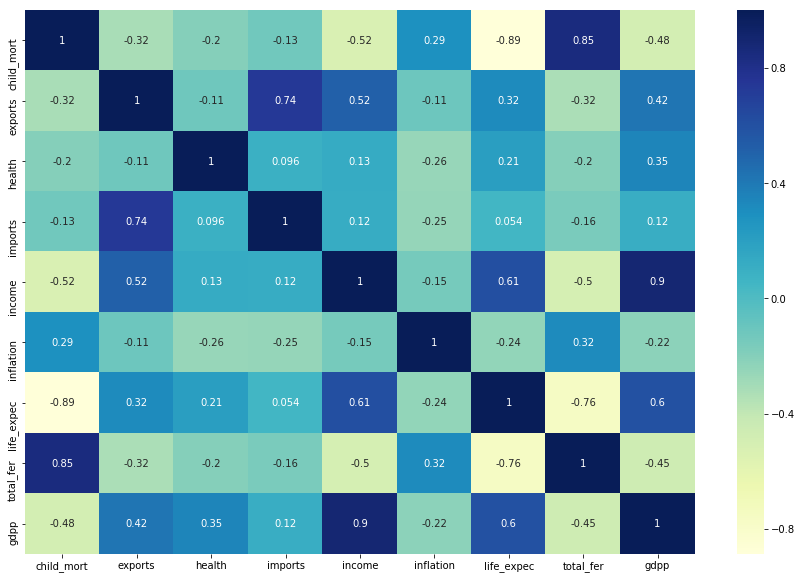

In [184]:
# Check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (15, 10))
sns.heatmap(country.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Visualising Numeric Variables

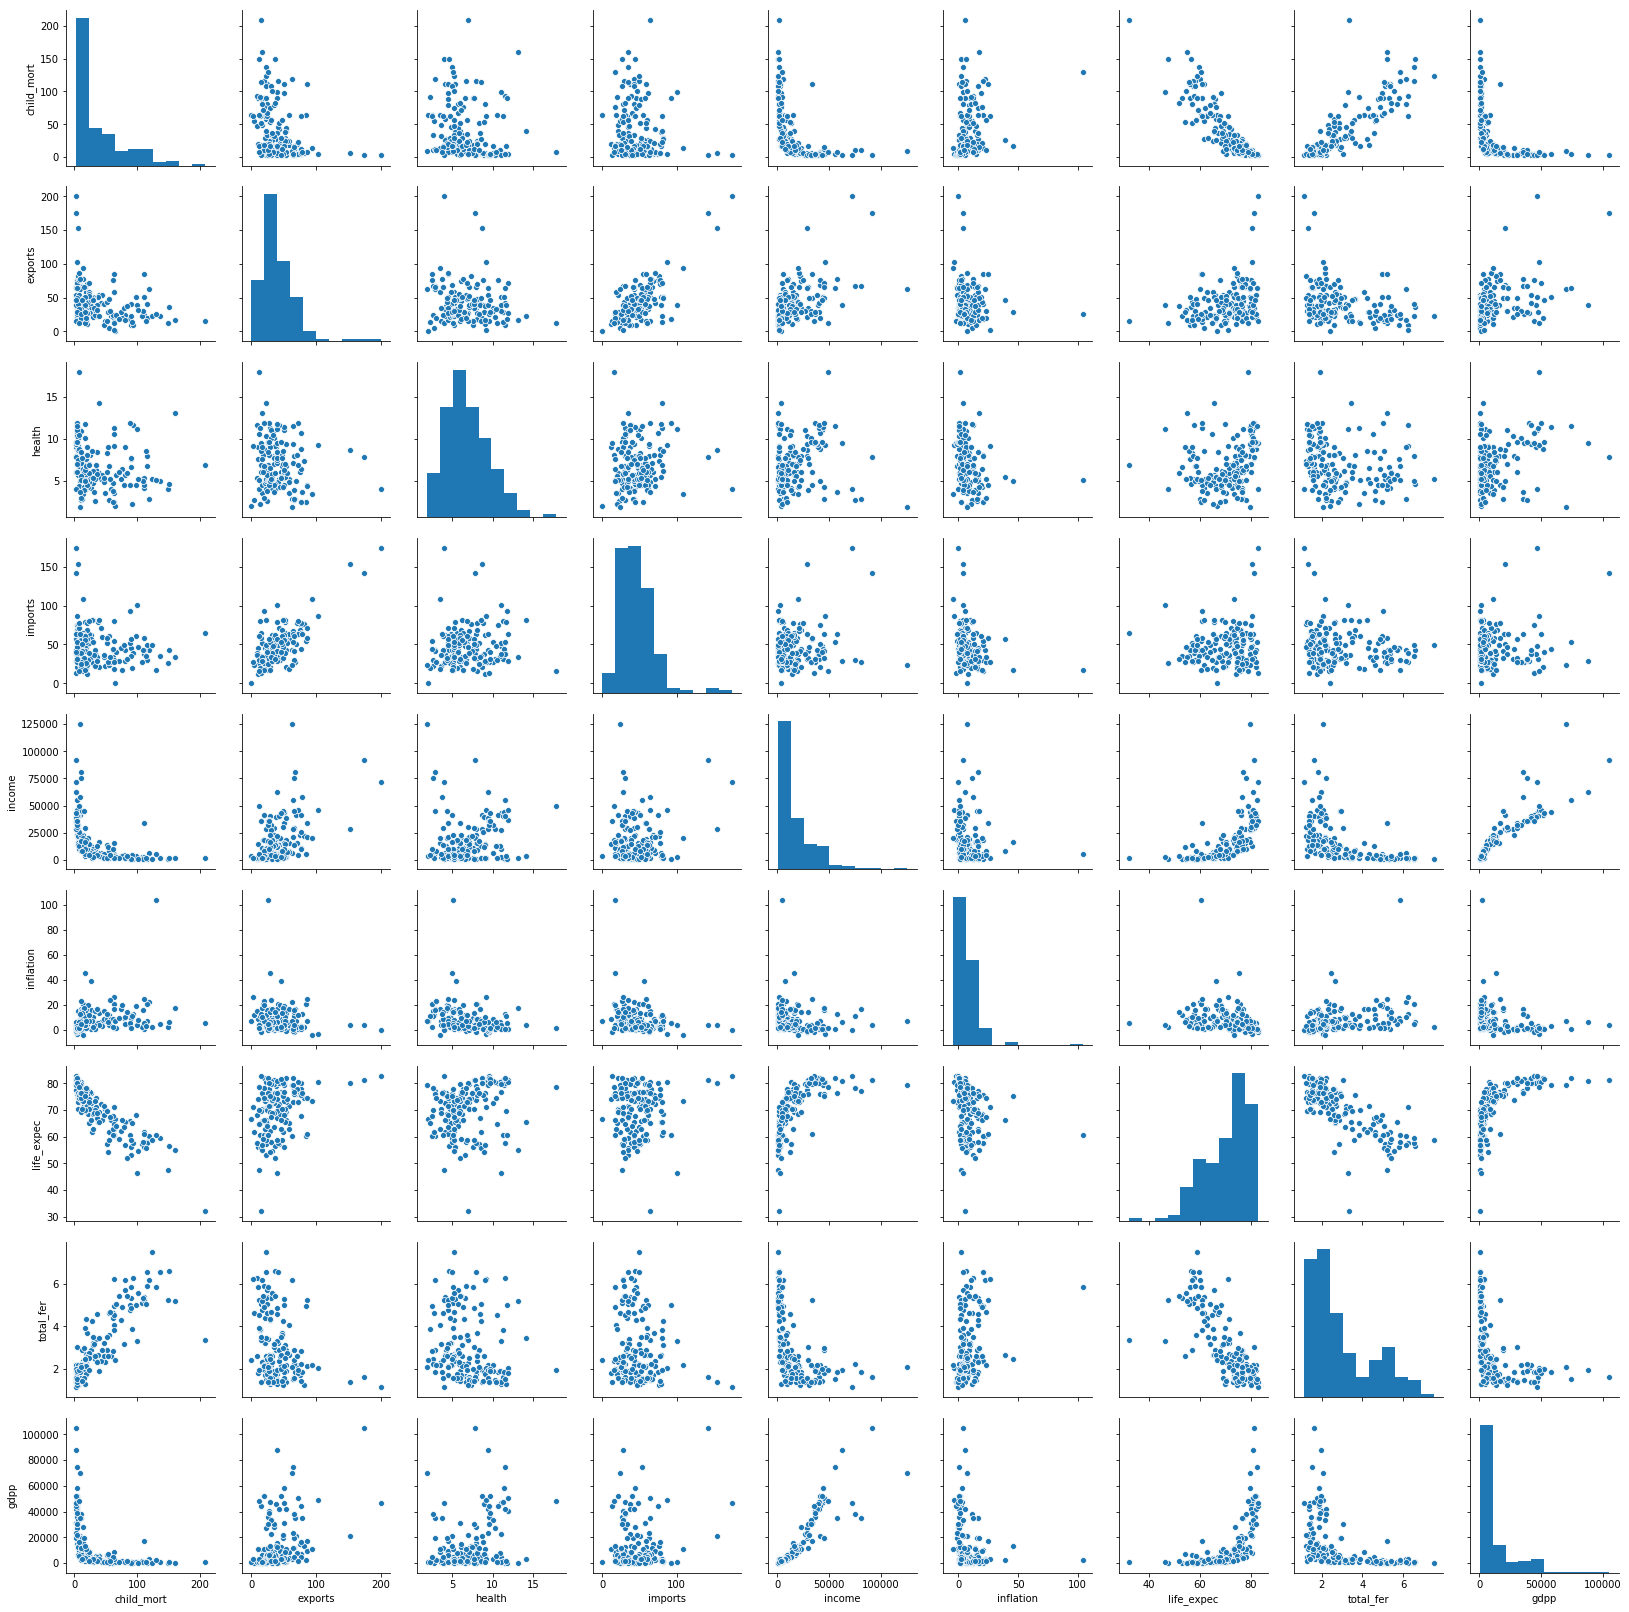

In [185]:
sns.pairplot(country)
plt.show()

In [186]:
country.shape

(167, 10)

## Step 3: Data Preparation

In [187]:
features=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
X=country.loc[:,features].values
Y=country.loc[:,'country'].values

### Rescaling the Features

In [188]:
# standardise all parameters
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_norm1 = standard_scaler.fit_transform(X)

In [189]:
country_norm2 = pd.DataFrame(country_norm1)
country_norm2.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
country_norm2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [190]:
country_norm2.shape

(167, 9)

## Step 4: PCA Analysis

In [191]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [192]:
# Doing the PCA
pca.fit(country_norm2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [193]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8
0,-0.419519,0.283897,0.150838,0.161482,0.398441,-0.193173,0.425839,-0.403729,0.392645
1,0.192884,0.613163,-0.243087,0.671821,0.022536,-0.008404,-0.222707,0.155233,-0.046022
2,-0.029544,0.144761,-0.596632,-0.299927,0.301548,0.642520,0.113919,0.019549,0.122977
3,0.370653,0.003091,0.461897,-0.071907,0.392159,0.150442,-0.203797,0.378304,0.531995
4,-0.168970,0.057616,0.518000,0.255376,-0.247150,0.714869,0.108220,-0.135262,-0.180167
5,0.200628,-0.059333,0.007276,-0.030032,0.160347,0.066285,-0.601127,-0.750689,0.016779
6,-0.079489,-0.707303,-0.249831,0.592190,0.095562,0.104633,0.018486,0.028826,0.242998
7,-0.682743,-0.014197,0.072497,-0.028946,0.352624,-0.011538,-0.504664,0.293353,-0.249696
8,0.327542,-0.123082,0.113088,0.099037,0.612982,-0.025236,0.294040,-0.026336,-0.625646


In [194]:
colnames = list(country_norm2.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income
5,-0.193173,-0.008404,inflation
6,0.425839,-0.222707,life_expec
7,-0.403729,0.155233,total_fer
8,0.392645,-0.046022,gdpp


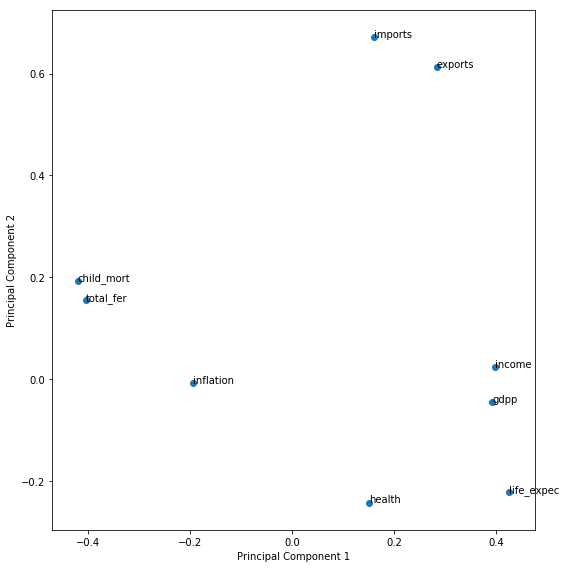

In [195]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [196]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

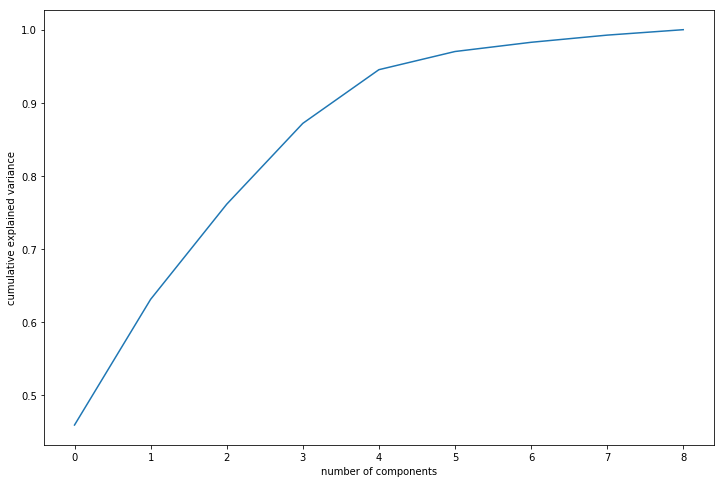

In [197]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [198]:
print(pca.explained_variance_ratio_.cumsum())

[0.4595174  0.63133365 0.76137624 0.87190786 0.94530998 0.97015232
 0.98275663 0.99256944 1.        ]


In [199]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [200]:
country_pca = pca_final.fit_transform(country_norm2)
country_pca1=pd.DataFrame(country_pca)
# Name the columns
country_pca1.columns=['PC{}'.format(i+1) for i in range(country_pca.shape[1])]
country_pca1.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


In [201]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(country_pca1.transpose())
pd.DataFrame(corrmat)

,0,1,2,3,4
0,1.000000,0.000052,-0.000180,-0.000122,-0.000509
1,0.000052,1.000000,-0.001024,-0.000272,-0.002375
2,-0.000180,-0.001024,1.000000,0.001052,0.007195
3,-0.000122,-0.000272,0.001052,1.000000,0.002685
4,-0.000509,-0.002375,0.007195,0.002685,1.000000


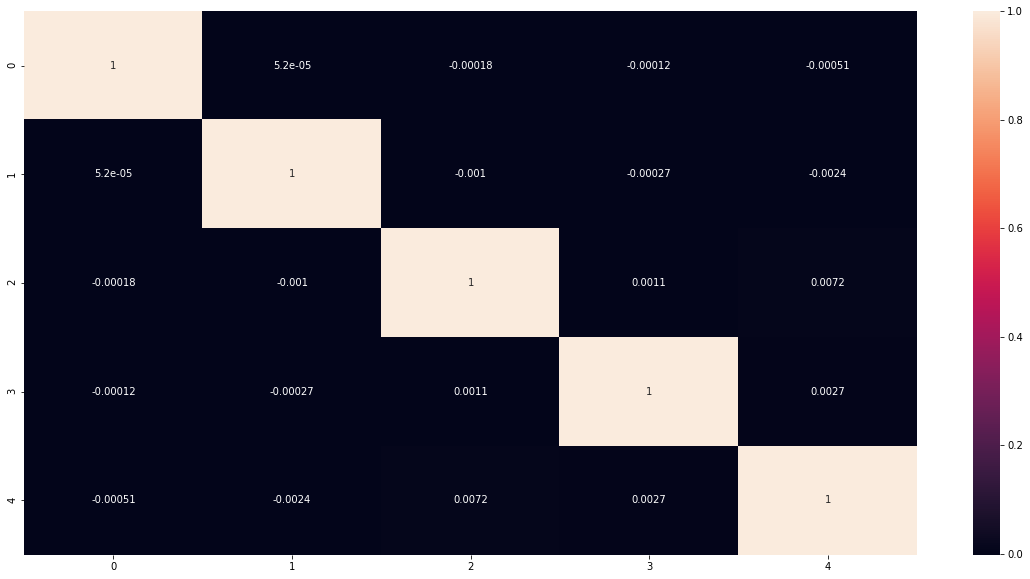

In [202]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [203]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.007194543060491426 , min corr:  -0.002374704497495838


In [204]:
country_pca1.shape

(167, 5)

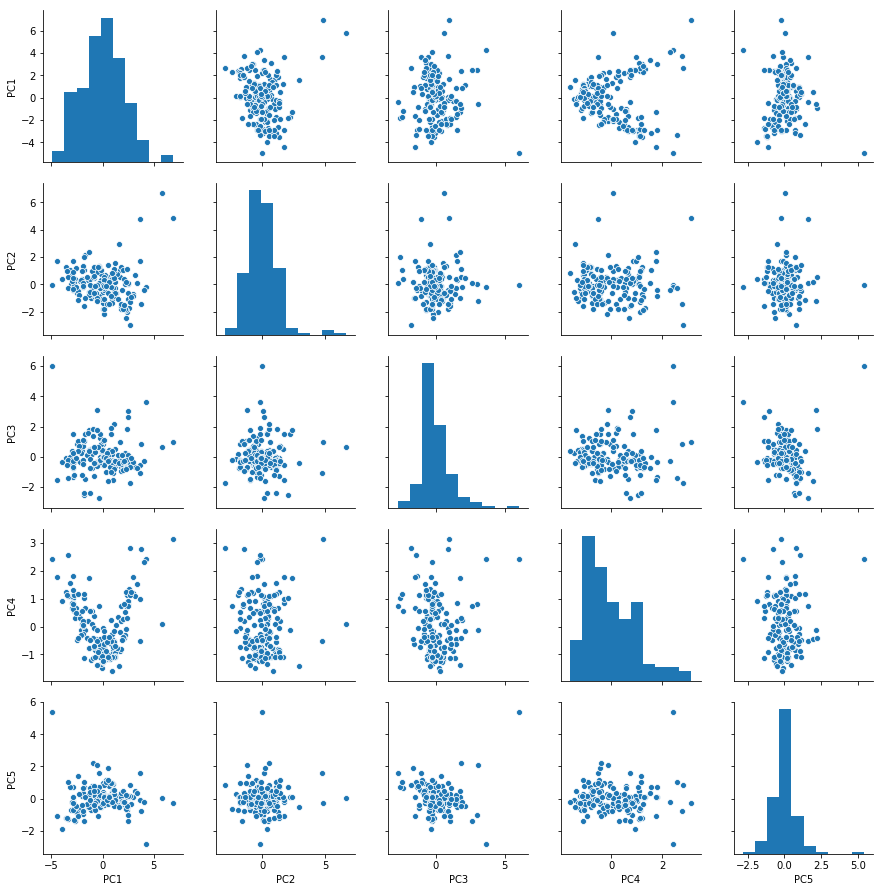

In [205]:
sns.pairplot(country_pca1)
plt.show()

In [206]:
Y=pd.DataFrame(Y)
Y.columns=['country']
country_pca1=pd.concat([Y,country_pca1],axis=1)
country_pca3=country_pca1.copy()
country_pca1.head()

,country,PC1,PC2,PC3,PC4,PC5
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186


### Outlier Treatment

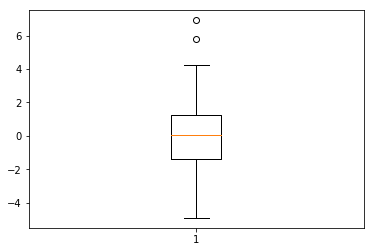

In [207]:
# outlier treatment for PC1
plt.boxplot(country_pca1.PC1)
Q1 = country_pca1.PC1.quantile(0.25)
Q3 = country_pca1.PC1.quantile(0.75)
IQR = Q3 - Q1
country_pca1 = country_pca1[(country_pca1.PC1 >= Q1 - 1.5*IQR) & (country_pca1.PC1 <= Q3 + 1.5*IQR)]

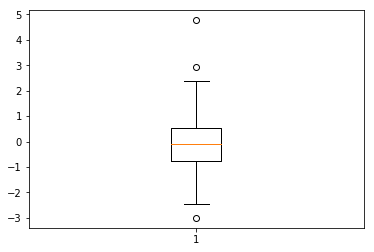

In [208]:
# outlier treatment for PC2
plt.boxplot(country_pca1.PC2)
Q1 = country_pca1.PC2.quantile(0.25)
Q3 = country_pca1.PC2.quantile(0.75)
IQR = Q3 - Q1
country_pca1 = country_pca1[(country_pca1.PC2 >= Q1 - 1.5*IQR) & (country_pca1.PC2 <= Q3 + 1.5*IQR)]

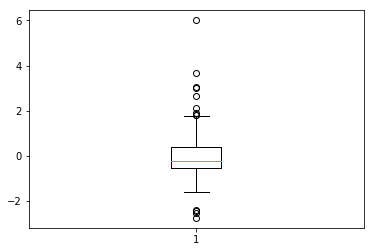

In [209]:
# outlier treatment for PC3
plt.boxplot(country_pca1.PC3)
Q1 = country_pca1.PC3.quantile(0.25)
Q3 = country_pca1.PC3.quantile(0.75)
IQR = Q3 - Q1
country_pca1 = country_pca1[(country_pca1.PC3 >= Q1 - 1.5*IQR) & (country_pca1.PC3 <= Q3 + 1.5*IQR)]

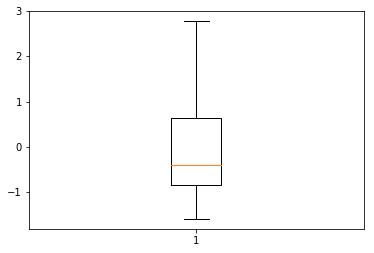

In [210]:
# outlier treatment for PC4
plt.boxplot(country_pca1.PC4)
Q1 = country_pca1.PC4.quantile(0.25)
Q3 = country_pca1.PC4.quantile(0.75)
IQR = Q3 - Q1
country_pca1 = country_pca1[(country_pca1.PC4 >= Q1 - 1.5*IQR) & (country_pca1.PC4 <= Q3 + 1.5*IQR)]

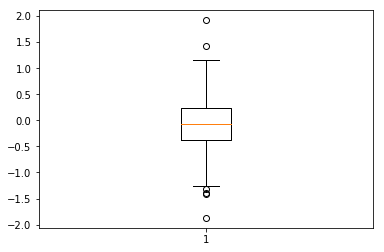

In [211]:
# outlier treatment for PC5
plt.boxplot(country_pca1.PC5)
Q1 = country_pca1.PC5.quantile(0.25)
Q3 = country_pca1.PC5.quantile(0.75)
IQR = Q3 - Q1
country_pca1 = country_pca1[(country_pca1.PC5 >= Q1 - 1.5*IQR) & (country_pca1.PC5 <= Q3 + 1.5*IQR)]

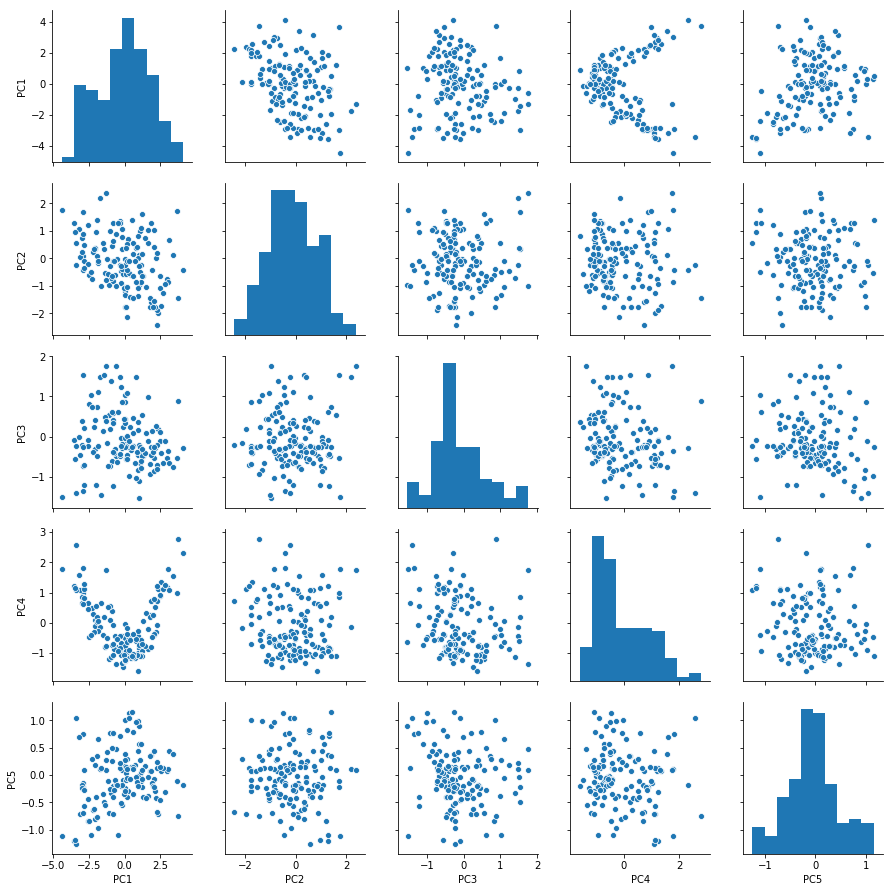

In [212]:
sns.pairplot(country_pca1)
plt.show()

In [213]:
country_pca1.shape

(143, 6)

In [214]:
# Drop country column
country_pca2=country_pca1.drop('country',axis=1)
country_pca2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


In [215]:
# Outlier dataframe
common = country_pca3.merge(country_pca2,on=['PC1','PC2','PC3','PC4','PC5'])
country_outlier=country_pca3[(~country_pca3.PC1.isin(common.PC1))&(~country_pca3.PC2.isin(common.PC2))&(~country_pca3.PC3.isin(common.PC3))&(~country_pca3.PC4.isin(common.PC4))&(~country_pca3.PC5.isin(common.PC5))]
country_outlier1=country_outlier.drop('country',axis=1)
country_outlier1

,PC1,PC2,PC3,PC4,PC5
17,-2.673005,0.411199,-0.237232,0.289668,-1.411854
23,2.460675,0.028279,3.022549,0.801236,-1.015430
28,-2.808332,0.073705,-0.327757,0.551092,-1.313929
31,-3.965158,0.383685,-0.317099,0.924645,-1.871714
81,-1.239012,0.363314,-2.390193,0.567308,0.672742
82,2.465928,0.095841,2.663895,0.735404,-1.373045
87,-1.802459,2.037592,-2.545362,1.037138,0.725376
88,-1.773525,1.046886,-2.419179,1.154309,1.015929
91,6.917851,4.855313,0.960087,3.134611,-0.267129
98,3.679226,4.764726,-1.054303,-0.520945,1.602601


## Step 5: K-Mean Clustering

### Hopkins Statistics:

In [216]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [217]:
hopkins(country_pca2)

0.7313072993043056

### Silhouette Analysis

In [218]:
import sklearn.metrics as skm
import sklearn.cluster as skc
sse_=[]
for k in range(2,9):
    kmeans_model = skc.KMeans(n_clusters=k, random_state=0).fit(country_pca2)
    score = skm.silhouette_score(country_pca2, kmeans_model.labels_)
    sse_.append((k,score))
    print('k = %d, silhouette_score = %f'%(k, score))

k = 2, silhouette_score = 0.345716
k = 3, silhouette_score = 0.359567
k = 4, silhouette_score = 0.291208
k = 5, silhouette_score = 0.268341
k = 6, silhouette_score = 0.273896
k = 7, silhouette_score = 0.247435
k = 8, silhouette_score = 0.266739


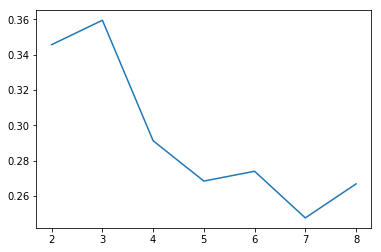

In [219]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### Sum of Squared Distances

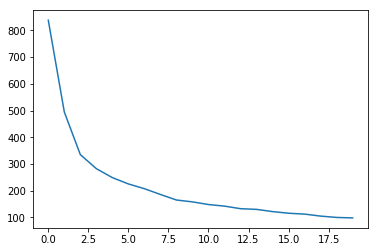

In [220]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_pca2)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

### K-mean clustering without outlier data

In [221]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters =3, max_iter=10,random_state=0)
model_clus3.fit(country_pca2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [222]:
ClusterID=pd.DataFrame(model_clus3.labels_)
ClusterID.columns=['ClusterID']
ClusterID.head()

,ClusterID
0,0
1,1
2,1
3,0
4,1


In [223]:
final_df=country_pca1.merge(country,how='left', left_on='country',right_on='country')
final_df.head()

,country,PC1,PC2,PC3,PC4,PC5,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [224]:
final_df.index = pd.RangeIndex(len(final_df.index))
country_km = pd.concat([final_df, ClusterID], axis=1)
country_km.columns = ['country','PC1','PC2','PC3','PC4','PC5','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','ClusterID']
country_km.head()

,country,PC1,PC2,PC3,PC4,PC5,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [225]:
country_km.to_csv('k_3_cluster_without_outlier.csv')

<Figure size 1440x1440 with 0 Axes>

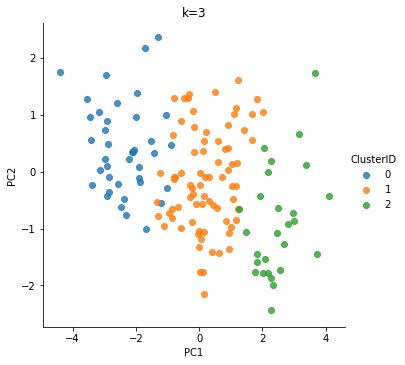

In [226]:
# Scatterplot, colored by cluster
plt.figure(figsize=(20, 20))

sns.lmplot(x='PC1',y='PC2',hue='ClusterID',data=country_km, fit_reg=False)
plt.title('k=3')

plt.show()

<Figure size 1440x1440 with 0 Axes>

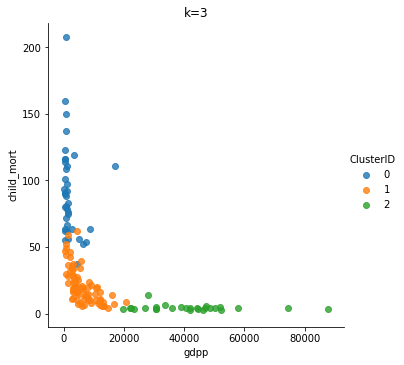

In [227]:
# Scatterplot, colored by cluster
plt.figure(figsize=(20, 20))
sns.lmplot(x='gdpp',y='child_mort',hue='ClusterID',data=country_km, fit_reg=False)
plt.title('k=3')

plt.show()

In [228]:
clust1_data=country_km[country_km.ClusterID == 0]
clust2_data=country_km[country_km.ClusterID == 1]
clust3_data=country_km[country_km.ClusterID == 2]

print(clust1_data.shape)
print(clust2_data.shape)
print(clust3_data.shape)

(39, 16)
(77, 16)
(27, 16)


In [229]:
km_clusters_PC1 = pd.DataFrame(country_km.groupby(["ClusterID"]).PC1.mean())
km_clusters_PC2 = pd.DataFrame(country_km.groupby(["ClusterID"]).PC2.mean())
km_clusters_PC3 = pd.DataFrame(country_km.groupby(["ClusterID"]).PC3.mean())
km_clusters_PC4 = pd.DataFrame(country_km.groupby(["ClusterID"]).PC4.mean())
km_clusters_PC5 = pd.DataFrame(country_km.groupby(["ClusterID"]).PC5.mean())
km_clusters_child_mort = pd.DataFrame(country_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(country_km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(country_km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(country_km.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(country_km.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(country_km.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(country_km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(country_km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(country_km.groupby(["ClusterID"]).gdpp.mean())

In [230]:
df = pd.concat([pd.Series([0,1,2]),km_clusters_PC1,km_clusters_PC2,km_clusters_PC3,km_clusters_PC4,km_clusters_PC5,km_clusters_child_mort,km_clusters_exports,km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ['ClusterID','PC1_mean','PC2_mean','PC3_mean','PC4_mean','PC5_mean','child_mort_mean','exports_mean','health_mean','imports_mean','income_mean','inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']
df

,ClusterID,PC1_mean,PC2_mean,PC3_mean,PC4_mean,PC5_mean,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,-2.381689,0.415688,-0.073024,0.626552,-0.281823,91.202564,31.102821,6.119487,40.507692,4310.641026,10.730256,59.374359,5.012051,2023.615385
1,1,0.217708,-0.137744,-0.030041,-0.802219,0.099812,21.261039,40.833506,6.208701,47.489610,12088.181818,6.638494,73.064935,2.276364,6274.467532
2,2,2.468969,-0.901149,-0.304228,0.819821,-0.114772,4.429630,44.048148,9.703333,42.114815,37811.111111,1.179370,80.466667,1.752222,41492.592593


In [231]:
df.to_csv('k_3_cluster_mean_without_outlier.csv')

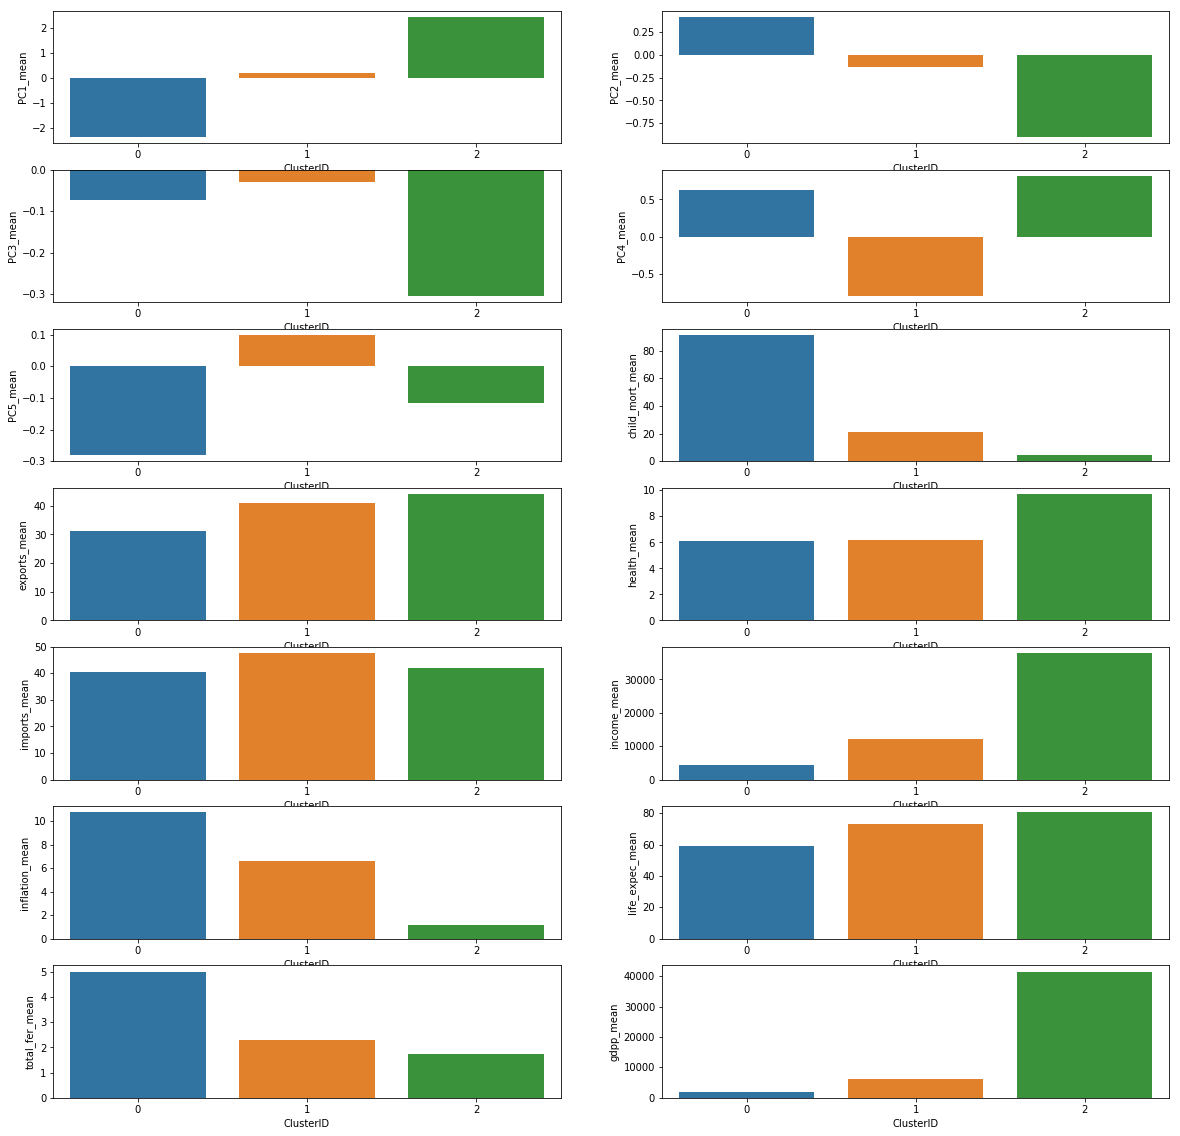

In [232]:
plt.figure(figsize=(20, 20))
plt.subplot(7,2,1)
sns.barplot(x=df.ClusterID, y=df.PC1_mean)

plt.subplot(7,2,2)
sns.barplot(x=df.ClusterID, y=df.PC2_mean)

plt.subplot(7,2,3)
sns.barplot(x=df.ClusterID, y=df.PC3_mean)

plt.subplot(7,2,4)
sns.barplot(x=df.ClusterID, y=df.PC4_mean)

plt.subplot(7,2,5)
sns.barplot(x=df.ClusterID, y=df.PC5_mean)

plt.subplot(7,2,6)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)

plt.subplot(7,2,7)
sns.barplot(x=df.ClusterID, y=df.exports_mean)

plt.subplot(7,2,8)
sns.barplot(x=df.ClusterID, y=df.health_mean)

plt.subplot(7,2,9)
sns.barplot(x=df.ClusterID, y=df.imports_mean)

plt.subplot(7,2,10)
sns.barplot(x=df.ClusterID, y=df.income_mean)

plt.subplot(7,2,11)
sns.barplot(x=df.ClusterID, y=df.inflation_mean)

plt.subplot(7,2,12)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)

plt.subplot(7,2,13)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)

plt.subplot(7,2,14)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

plt.show()

In [233]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters =4, max_iter=10,random_state=0)
model_clus4.fit(country_pca2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [234]:
ClusterID=pd.DataFrame(model_clus4.labels_)
ClusterID.columns=['ClusterID']
ClusterID.head()

,ClusterID
0,1
1,2
2,2
3,1
4,0


In [235]:
final_df1=country_pca1.merge(country,how='left', left_on='country',right_on='country')
final_df1.head()

,country,PC1,PC2,PC3,PC4,PC5,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [236]:
final_df1.index = pd.RangeIndex(len(final_df1.index))
country_km = pd.concat([final_df1, ClusterID], axis=1)
country_km.columns = ['country','PC1','PC2','PC3','PC4','PC5','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','ClusterID']
country_km.head()

,country,PC1,PC2,PC3,PC4,PC5,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [237]:
country_km.to_csv('k_4_cluster_without_outlier.csv')

<Figure size 1440x1440 with 0 Axes>

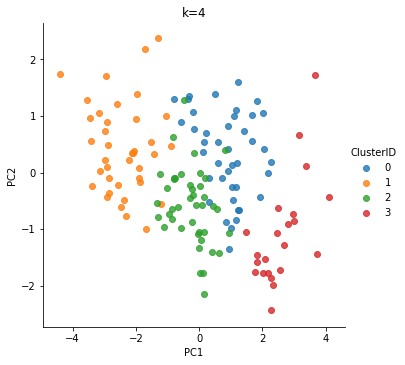

In [238]:
# Scatterplot, colored by cluster
plt.figure(figsize=(20, 20))

sns.lmplot(x='PC1',y='PC2',hue='ClusterID',data=country_km, fit_reg=False)
plt.title('k=4')

plt.show()

<Figure size 1440x1440 with 0 Axes>

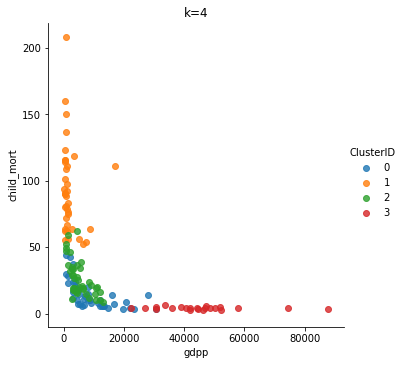

In [239]:
# Scatterplot, colored by cluster
plt.figure(figsize=(20, 20))
sns.lmplot(x='gdpp',y='child_mort',hue='ClusterID',data=country_km, fit_reg=False)
plt.title('k=4')

plt.show()

silhouette_score of K=3 is more and cluster formed using K=3 forms stable cluster

### K-mean clustering of outlier data

In [240]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters =3, max_iter=10,random_state=0)
model_clus3.fit(country_outlier1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [241]:
ClusterID=pd.DataFrame(model_clus3.labels_)
ClusterID.columns=['ClusterID']
ClusterID.head()

,ClusterID
0,2
1,0
2,2
3,2
4,2


In [242]:
final_df2=country_outlier.merge(country,how='left', left_on='country',right_on='country')
final_df2.head()

,country,PC1,PC2,PC3,PC4,PC5,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Benin,-2.673005,0.411199,-0.237232,0.289668,-1.411854,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758
1,Brunei,2.460675,0.028279,3.022549,0.801236,-1.015430,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
2,Cameroon,-2.808332,0.073705,-0.327757,0.551092,-1.313929,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310
3,Central African Republic,-3.965158,0.383685,-0.317099,0.924645,-1.871714,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
4,Kiribati,-1.239012,0.363314,-2.390193,0.567308,0.672742,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84,1490


In [243]:
final_df2.index = pd.RangeIndex(len(final_df2.index))
country_km = pd.concat([final_df2, ClusterID], axis=1)
country_km.columns = ['country','PC1','PC2','PC3','PC4','PC5','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','ClusterID']
country_km.head()

,country,PC1,PC2,PC3,PC4,PC5,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Benin,-2.673005,0.411199,-0.237232,0.289668,-1.411854,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,2
1,Brunei,2.460675,0.028279,3.022549,0.801236,-1.015430,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0
2,Cameroon,-2.808332,0.073705,-0.327757,0.551092,-1.313929,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,2
3,Central African Republic,-3.965158,0.383685,-0.317099,0.924645,-1.871714,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,2
4,Kiribati,-1.239012,0.363314,-2.390193,0.567308,0.672742,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84,1490,2


In [244]:
country_km.to_csv('k_3_cluster_outlier.csv')

<Figure size 1440x1440 with 0 Axes>

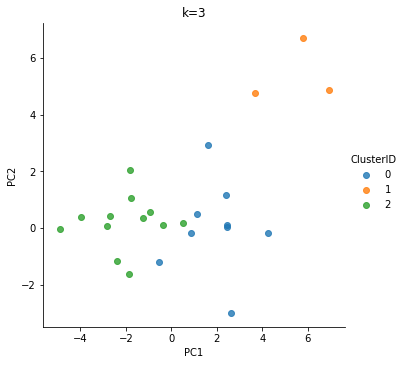

In [245]:
# Scatterplot, colored by cluster
plt.figure(figsize=(20, 20))

sns.lmplot(x='PC1',y='PC2',hue='ClusterID',data=country_km, fit_reg=False)
plt.title('k=3')

plt.show()

<Figure size 1440x1440 with 0 Axes>

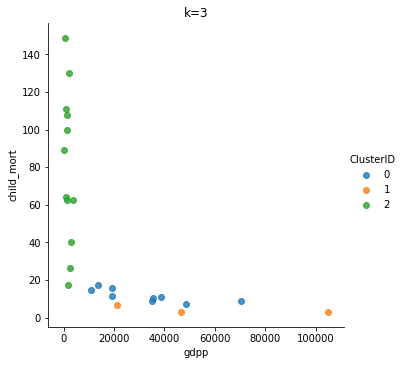

In [246]:
# Scatterplot, colored by cluster
plt.figure(figsize=(20, 20))
sns.lmplot(x='gdpp',y='child_mort',hue='ClusterID',data=country_km, fit_reg=False)
plt.title('k=3')

plt.show()

In [247]:
clust1_data=country_km[country_km.ClusterID == 0]
clust2_data=country_km[country_km.ClusterID == 1]
clust3_data=country_km[country_km.ClusterID == 2]

print(clust1_data.shape)
print(clust2_data.shape)
print(clust3_data.shape)

(9, 16)
(3, 16)
(12, 16)


In [248]:
km_clusters_PC1 = pd.DataFrame(country_km.groupby(["ClusterID"]).PC1.mean())
km_clusters_PC2 = pd.DataFrame(country_km.groupby(["ClusterID"]).PC2.mean())
km_clusters_PC3 = pd.DataFrame(country_km.groupby(["ClusterID"]).PC3.mean())
km_clusters_PC4 = pd.DataFrame(country_km.groupby(["ClusterID"]).PC4.mean())
km_clusters_PC5 = pd.DataFrame(country_km.groupby(["ClusterID"]).PC5.mean())
km_clusters_child_mort = pd.DataFrame(country_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(country_km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(country_km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(country_km.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(country_km.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(country_km.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(country_km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(country_km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(country_km.groupby(["ClusterID"]).gdpp.mean())

In [249]:
df = pd.concat([pd.Series([0,1,2]),km_clusters_PC1,km_clusters_PC2,km_clusters_PC3,km_clusters_PC4,km_clusters_PC5,km_clusters_child_mort,km_clusters_exports,km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ['ClusterID','PC1_mean','PC2_mean','PC3_mean','PC4_mean','PC5_mean','child_mort_mean','exports_mean','health_mean','imports_mean','income_mean','inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']
df

,ClusterID,PC1_mean,PC2_mean,PC3_mean,PC4_mean,PC5_mean,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,1.919404,0.015505,1.796512,0.623910,-0.435383,11.677778,58.233333,4.912222,40.155556,57266.666667,13.676667,76.666667,2.268889,32266.666667
1,1,5.460016,5.434769,0.178056,0.901254,0.453649,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
2,2,-2.016205,0.190132,-0.277292,0.573430,0.746825,80.000000,22.217417,7.909167,52.138825,2988.166667,17.298750,61.191667,4.140833,1629.916667


In [250]:
df.to_csv('k_3_cluster_mean_outlier.csv')

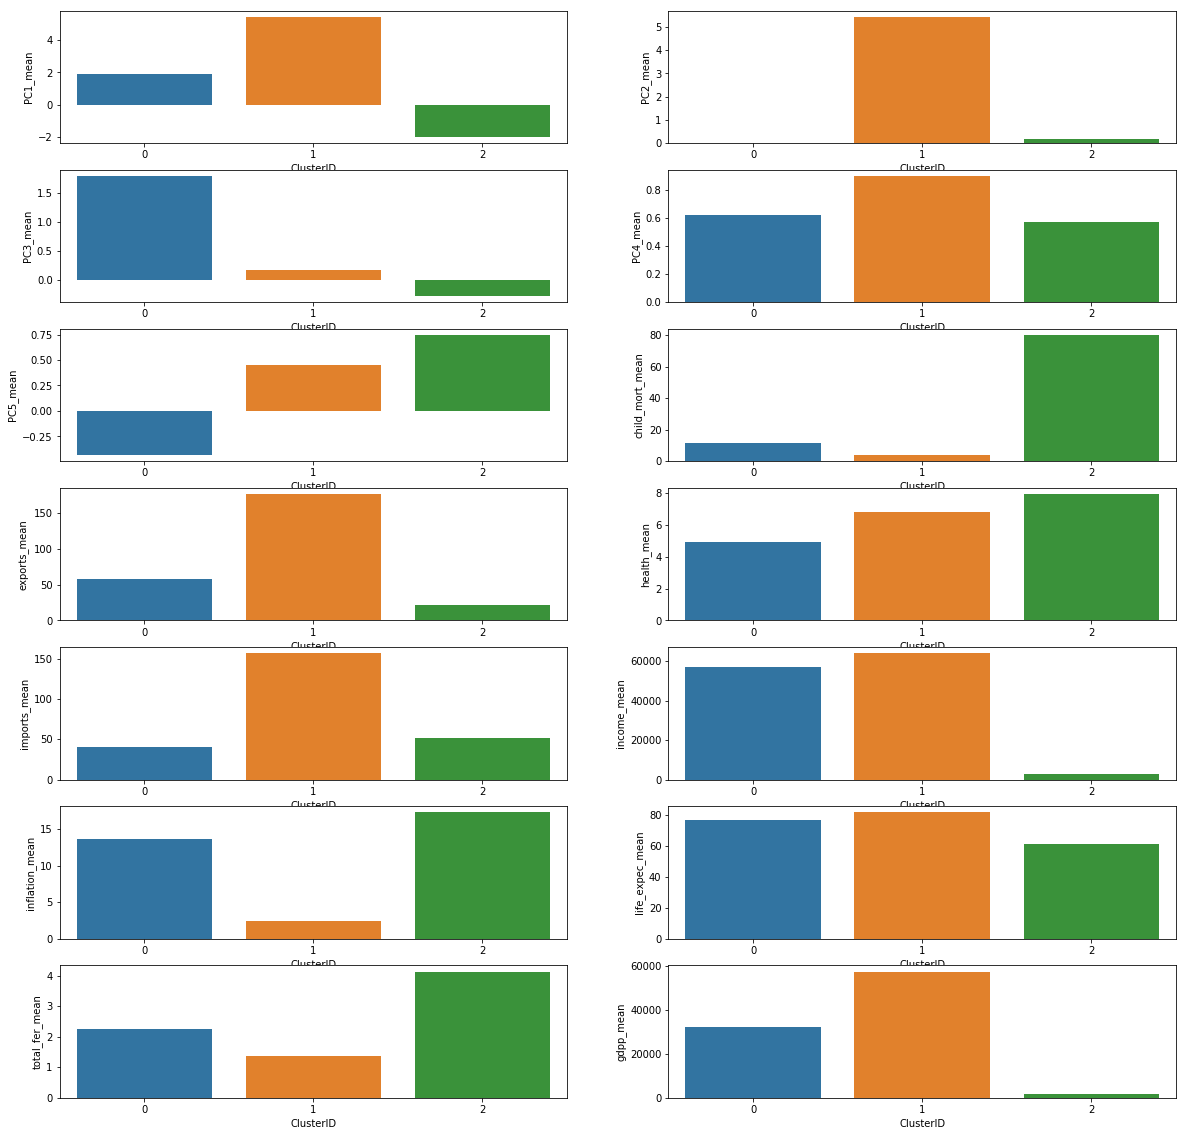

In [251]:
plt.figure(figsize=(20, 20))
plt.subplot(7,2,1)
sns.barplot(x=df.ClusterID, y=df.PC1_mean)

plt.subplot(7,2,2)
sns.barplot(x=df.ClusterID, y=df.PC2_mean)

plt.subplot(7,2,3)
sns.barplot(x=df.ClusterID, y=df.PC3_mean)

plt.subplot(7,2,4)
sns.barplot(x=df.ClusterID, y=df.PC4_mean)

plt.subplot(7,2,5)
sns.barplot(x=df.ClusterID, y=df.PC5_mean)

plt.subplot(7,2,6)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)

plt.subplot(7,2,7)
sns.barplot(x=df.ClusterID, y=df.exports_mean)

plt.subplot(7,2,8)
sns.barplot(x=df.ClusterID, y=df.health_mean)

plt.subplot(7,2,9)
sns.barplot(x=df.ClusterID, y=df.imports_mean)

plt.subplot(7,2,10)
sns.barplot(x=df.ClusterID, y=df.income_mean)

plt.subplot(7,2,11)
sns.barplot(x=df.ClusterID, y=df.inflation_mean)

plt.subplot(7,2,12)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)

plt.subplot(7,2,13)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)

plt.subplot(7,2,14)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

plt.show()

## Step 6: Heirarchical Clustering

### Heirarchical clustering without outlier data

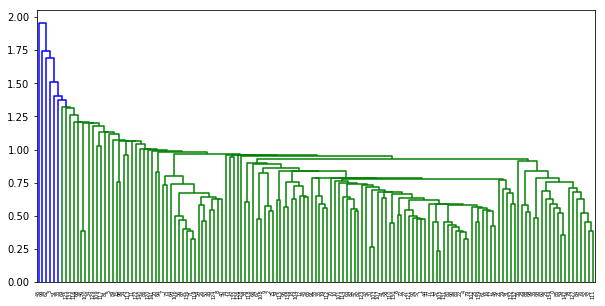

In [252]:
# heirarchical clustering
plt.figure(figsize=(10, 5))
mergings = linkage(country_pca2, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

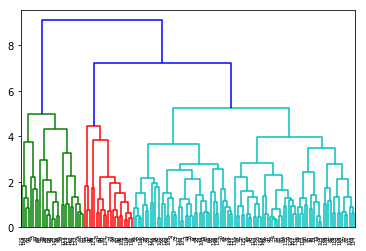

In [253]:
# heirarchical clustering
mergings = linkage(country_pca2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [254]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
country_hc = pd.concat([final_df, clusterCut], axis=1)
country_hc.columns = ['country','PC1','PC2','PC3','PC4','PC5','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','ClusterID']
country_hc.head()

,country,PC1,PC2,PC3,PC4,PC5,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [255]:
country_hc.to_csv('cut_3_h_without_outlier.csv')

In [256]:
km_clusters_PC1 = pd.DataFrame(country_hc.groupby(["ClusterID"]).PC1.mean())
km_clusters_PC2 = pd.DataFrame(country_hc.groupby(["ClusterID"]).PC2.mean())
km_clusters_PC3 = pd.DataFrame(country_hc.groupby(["ClusterID"]).PC3.mean())
km_clusters_PC4 = pd.DataFrame(country_hc.groupby(["ClusterID"]).PC4.mean())
km_clusters_PC5 = pd.DataFrame(country_hc.groupby(["ClusterID"]).PC5.mean())
km_clusters_child_mort = pd.DataFrame(country_hc.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(country_hc.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(country_hc.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(country_hc.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(country_hc.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(country_hc.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(country_hc.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(country_hc.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(country_hc.groupby(["ClusterID"]).gdpp.mean())

In [257]:
df = pd.concat([pd.Series([0,1,2]),km_clusters_PC1,km_clusters_PC2,km_clusters_PC3,km_clusters_PC4,km_clusters_PC5,km_clusters_child_mort,km_clusters_exports,km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ['ClusterID','PC1_mean','PC2_mean','PC3_mean','PC4_mean','PC5_mean','child_mort_mean','exports_mean','health_mean','imports_mean','income_mean','inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']
df.head()

,ClusterID,PC1_mean,PC2_mean,PC3_mean,PC4_mean,PC5_mean,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,-2.532790,0.655795,-0.329708,0.912189,-0.205684,99.659259,34.126667,6.847037,44.711111,4151.296296,10.358889,57.088889,5.227778,2092.148148
1,1,0.036226,-0.143489,0.025426,-0.661560,0.010949,26.693684,39.322842,6.079684,45.635789,12217.052632,6.885095,72.341053,2.528632,6950.178947
2,2,2.642078,-1.085736,-0.328030,1.096144,-0.090051,4.138095,42.352381,10.299048,39.571429,40338.095238,1.319667,80.971429,1.747143,45980.952381


In [258]:
df.to_csv('cut_3_hmean_without_outlier.csv')

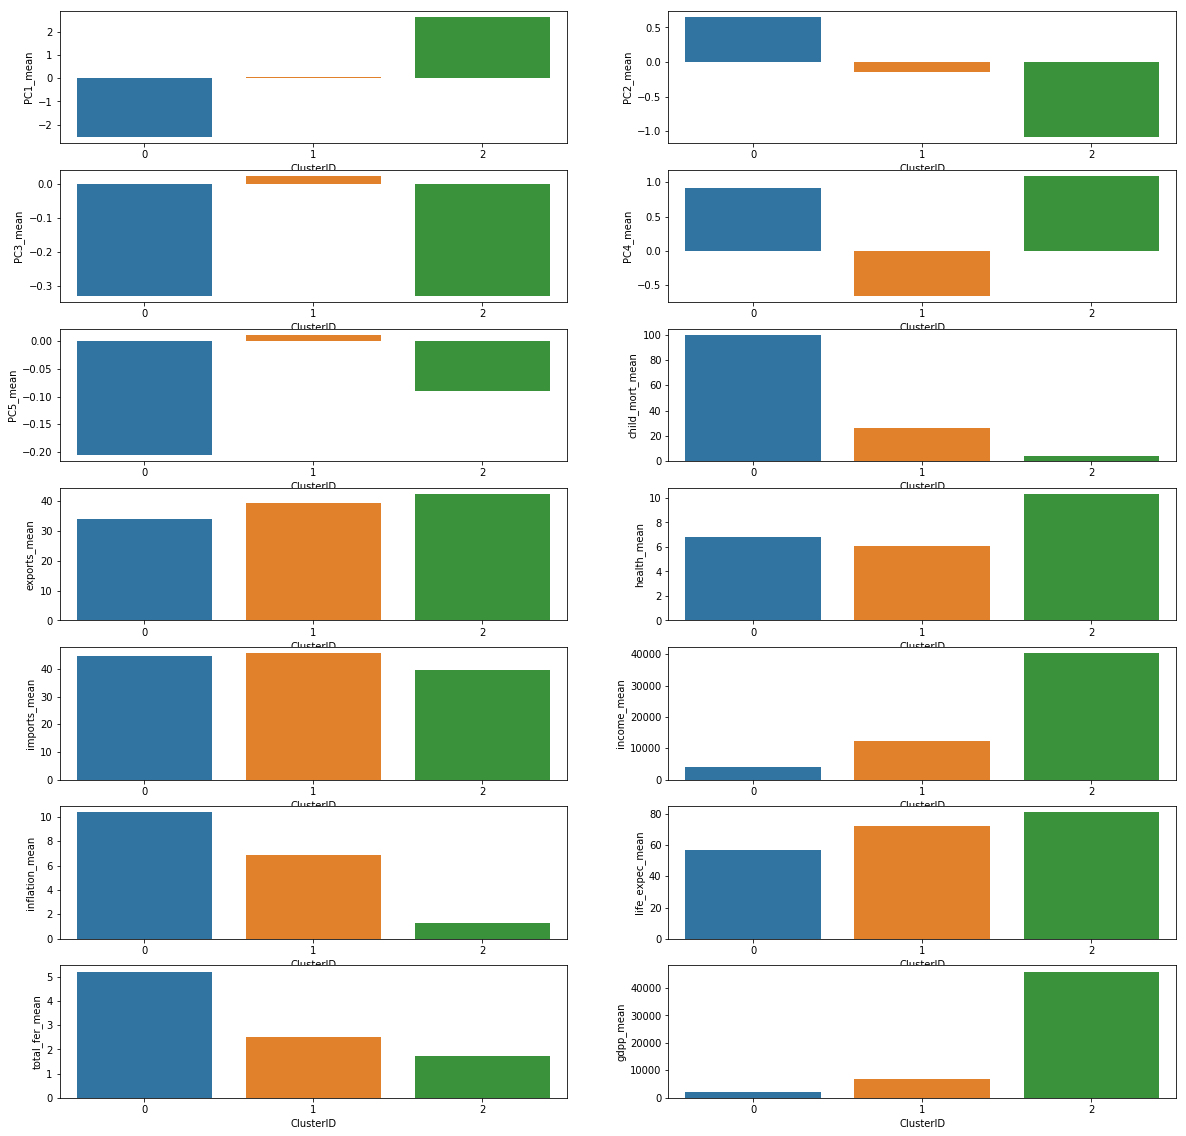

In [259]:
plt.figure(figsize=(20, 20))
plt.subplot(7,2,1)
sns.barplot(x=df.ClusterID, y=df.PC1_mean)

plt.subplot(7,2,2)
sns.barplot(x=df.ClusterID, y=df.PC2_mean)

plt.subplot(7,2,3)
sns.barplot(x=df.ClusterID, y=df.PC3_mean)

plt.subplot(7,2,4)
sns.barplot(x=df.ClusterID, y=df.PC4_mean)

plt.subplot(7,2,5)
sns.barplot(x=df.ClusterID, y=df.PC5_mean)

plt.subplot(7,2,6)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)

plt.subplot(7,2,7)
sns.barplot(x=df.ClusterID, y=df.exports_mean)

plt.subplot(7,2,8)
sns.barplot(x=df.ClusterID, y=df.health_mean)

plt.subplot(7,2,9)
sns.barplot(x=df.ClusterID, y=df.imports_mean)

plt.subplot(7,2,10)
sns.barplot(x=df.ClusterID, y=df.income_mean)

plt.subplot(7,2,11)
sns.barplot(x=df.ClusterID, y=df.inflation_mean)

plt.subplot(7,2,12)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)

plt.subplot(7,2,13)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)

plt.subplot(7,2,14)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

plt.show()

### K-mean clustering of outlier data

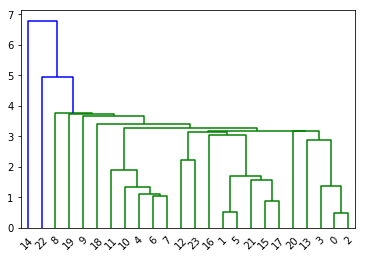

In [260]:
# heirarchical clustering
mergings = linkage(country_outlier1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

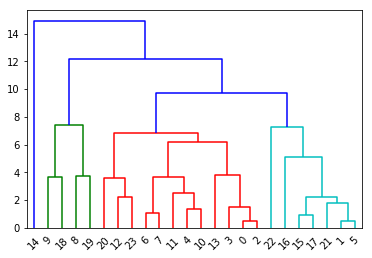

In [261]:
# heirarchical clustering
mergings = linkage(country_outlier1, method = "complete", metric='euclidean')
dendrogram(mergings,color_threshold=8)
plt.show()

In [262]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
country_hc = pd.concat([final_df2, clusterCut], axis=1)
country_hc.columns = ['country','PC1','PC2','PC3','PC4','PC5','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','ClusterID']
country_hc.head()

,country,PC1,PC2,PC3,PC4,PC5,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Benin,-2.673005,0.411199,-0.237232,0.289668,-1.411854,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,0
1,Brunei,2.460675,0.028279,3.022549,0.801236,-1.015430,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0
2,Cameroon,-2.808332,0.073705,-0.327757,0.551092,-1.313929,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,0
3,Central African Republic,-3.965158,0.383685,-0.317099,0.924645,-1.871714,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,0
4,Kiribati,-1.239012,0.363314,-2.390193,0.567308,0.672742,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84,1490,0


In [263]:
country_hc.to_csv('cut_3_h_outlier.csv')

In [264]:
km_clusters_PC1 = pd.DataFrame(country_hc.groupby(["ClusterID"]).PC1.mean())
km_clusters_PC2 = pd.DataFrame(country_hc.groupby(["ClusterID"]).PC2.mean())
km_clusters_PC3 = pd.DataFrame(country_hc.groupby(["ClusterID"]).PC3.mean())
km_clusters_PC4 = pd.DataFrame(country_hc.groupby(["ClusterID"]).PC4.mean())
km_clusters_PC5 = pd.DataFrame(country_hc.groupby(["ClusterID"]).PC5.mean())
km_clusters_child_mort = pd.DataFrame(country_hc.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(country_hc.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(country_hc.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(country_hc.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(country_hc.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(country_hc.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(country_hc.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(country_hc.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(country_hc.groupby(["ClusterID"]).gdpp.mean())

In [265]:
df = pd.concat([pd.Series([0,1,2]),km_clusters_PC1,km_clusters_PC2,km_clusters_PC3,km_clusters_PC4,km_clusters_PC5,km_clusters_child_mort,km_clusters_exports,km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ['ClusterID','PC1_mean','PC2_mean','PC3_mean','PC4_mean','PC5_mean','child_mort_mean','exports_mean','health_mean','imports_mean','income_mean','inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']
df.head()

,ClusterID,PC1_mean,PC2_mean,PC3_mean,PC4_mean,PC5_mean,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,-0.190129,-0.024290,0.379581,0.604337,0.009099,48.457895,35.347842,6.876316,45.350837,27668.842105,12.151842,67.915789,3.268421,15622.578947
1,1,4.495544,4.809682,0.038292,0.325708,0.206745,6.700000,155.450000,5.945000,144.500000,53125.000000,0.798500,79.425000,1.577500,45875.000000
2,2,-4.909489,-0.051773,6.010058,2.414875,5.404537,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


In [266]:
df.to_csv('cut_3_hmean_outlier.csv')

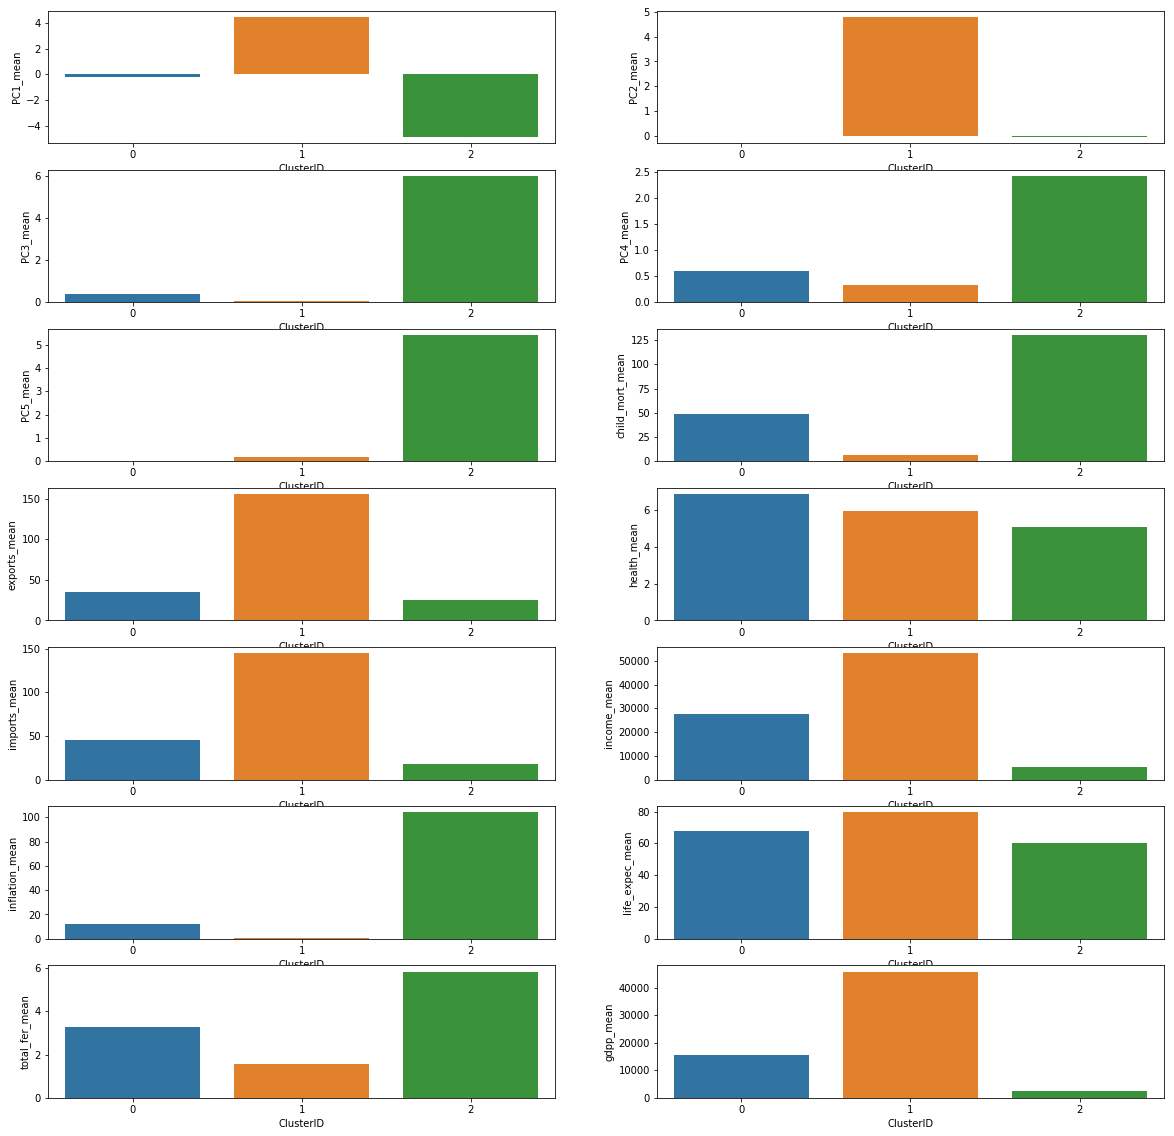

In [267]:
plt.figure(figsize=(20, 20))
plt.subplot(7,2,1)
sns.barplot(x=df.ClusterID, y=df.PC1_mean)

plt.subplot(7,2,2)
sns.barplot(x=df.ClusterID, y=df.PC2_mean)

plt.subplot(7,2,3)
sns.barplot(x=df.ClusterID, y=df.PC3_mean)

plt.subplot(7,2,4)
sns.barplot(x=df.ClusterID, y=df.PC4_mean)

plt.subplot(7,2,5)
sns.barplot(x=df.ClusterID, y=df.PC5_mean)

plt.subplot(7,2,6)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)

plt.subplot(7,2,7)
sns.barplot(x=df.ClusterID, y=df.exports_mean)

plt.subplot(7,2,8)
sns.barplot(x=df.ClusterID, y=df.health_mean)

plt.subplot(7,2,9)
sns.barplot(x=df.ClusterID, y=df.imports_mean)

plt.subplot(7,2,10)
sns.barplot(x=df.ClusterID, y=df.income_mean)

plt.subplot(7,2,11)
sns.barplot(x=df.ClusterID, y=df.inflation_mean)

plt.subplot(7,2,12)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)

plt.subplot(7,2,13)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)

plt.subplot(7,2,14)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)
